# Module

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#from scipy.stats import uniform

# from imblearn.under_sampling import RandomUnderSampler

#from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

#from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss

import matplotlib.pyplot as plt

import datetime

import warnings

warnings.filterwarnings('ignore')

#import torch

#from torch.utils.data import DataLoader, TensorDataset

# Rectified Dataset split

In [ ]:
train = pd.read_csv('train_compressed.csv')
val = pd.read_csv('validation_compressed.csv')
test = pd.read_csv('test_compressed.csv')

train = train.drop(['Unnamed: 0'], axis=1)
val = val.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [ ]:
X_train = train.drop('depvar', axis=1)
y_train = train['depvar']

X_val = val.drop('depvar', axis=1)
y_val = val['depvar']

X_test = test.drop('depvar', axis=1)
y_test = test['depvar']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(538132, 20)
(538132,)
(179377, 20)
(179377,)
(179378, 20)
(179378,)


# Training

## RandomForest
(K-fold cross validation -> K=cv)

### pipeline object



In [ ]:
# Define the pipeline
rf_clf = RandomForestClassifier(max_depth=5, min_samples_split=20)

### param_grid (hyperparameter input)

In [ ]:
# pipeline object에 대해 지정해줄 수 있는 hyperparameter를 얻을 수 있음
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# define the hyperparameters you want to search over
param_grid = {
    'n_estimators':[50,100,150],
    'max_features':['auto', 'sqrt', 'log2']
}

### Scoring Function

In [ ]:
# Define the scorer to use in the grid search
# greater_is_better=False -> since we want the negative value of log loss
scoring = {'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
#            'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),
#            'recall': make_scorer(recall_score),
#            'f1': make_scorer(f1_score)
          }

### Grid Search

In [ ]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scoring, refit='neg_log_loss')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5,
                                              min_samples_split=20),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             refit='neg_log_loss',
             scoring={'neg_log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)})

### Hyperparameter에 따른 Estimator 비교

In [ ]:
# 저장된된 파일들의 모델 이름 정해주기
model_name = 'RandomForest_compressed'

In [ ]:
# grid search 결과 df로 저장
df_result_ = pd.DataFrame(grid_search.cv_results_)

df_result_.to_csv('%s_estimator_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True, float_format='%.6f') # 이름 설정해줘야함

df_result_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_neg_log_loss,split1_test_neg_log_loss,split2_test_neg_log_loss,split3_test_neg_log_loss,split4_test_neg_log_loss,mean_test_neg_log_loss,std_test_neg_log_loss,rank_test_neg_log_loss
0,35.562479,0.571955,0.273191,0.004303,auto,50,"{'max_features': 'auto', 'n_estimators': 50}",-0.439068,-0.438622,-0.439225,-0.439188,-0.439068,-0.439034,0.000216,6
1,74.555919,0.505376,0.519118,0.004390,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",-0.439004,-0.438835,-0.439218,-0.439073,-0.439025,-0.439031,0.000123,5
2,112.622148,3.080240,0.761551,0.012190,auto,150,"{'max_features': 'auto', 'n_estimators': 150}",-0.439012,-0.438796,-0.439184,-0.439075,-0.439067,-0.439027,0.000128,4
3,37.265911,2.973823,0.285610,0.019402,sqrt,50,"{'max_features': 'sqrt', 'n_estimators': 50}",-0.439003,-0.438746,-0.439203,-0.438982,-0.439132,-0.439013,0.000157,3
4,76.466847,1.147657,0.531410,0.019267,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",-0.439016,-0.438786,-0.439171,-0.438967,-0.438991,-0.438986,0.000123,1
5,111.542186,3.183172,0.773452,0.011451,sqrt,150,"{'max_features': 'sqrt', 'n_estimators': 150}",-0.438950,-0.438714,-0.439193,-0.439083,-0.439016,-0.438991,0.000160,2
6,36.182849,0.555649,0.267077,0.004163,log2,50,"{'max_features': 'log2', 'n_estimators': 50}",-0.439009,-0.438728,-0.439221,-0.439198,-0.439078,-0.439047,0.000177,9
7,72.058465,0.639481,0.505788,0.008336,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",-0.439066,-0.438805,-0.439236,-0.439029,-0.439084,-0.439044,0.000139,8
8,114.597382,3.707066,0.771307,0.017437,log2,150,"{'max_features': 'log2', 'n_estimators': 150}",-0.439009,-0.438781,-0.439196,-0.439116,-0.439073,-0.439035,0.000141,7


# Validation

### best_estimator 확인

In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestClassifier(max_depth=5, min_samples_split=20)


### X_val에 대한 평가지표 확인

In [ ]:
pred_val = best_estimator.predict(X_val)
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)
#pred_val = dt.predict(X_val)


accuracy = accuracy_score(y_val, pred_val)
precision = precision_score(y_val, pred_val)
recall = recall_score(y_val, pred_val)
conf_matrix = confusion_matrix(y_val, pred_val)
print('\n 정확도: {0}, 정밀도도: {1}, 재현율율: {2}'.format(accuracy, precision, recall))
print(conf_matrix)


 정확도: 0.8379112149272203, 정밀도도: 0.0, 재현율율: 0.0
[[150302      0]
 [ 29075      0]]


### X_val fitting

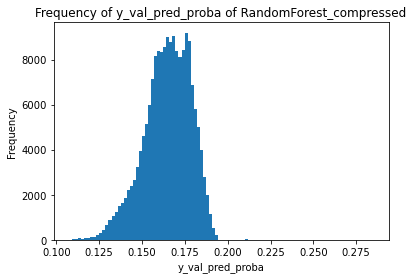

In [ ]:
# Predict probabilities for new data
y_val_pred_proba = best_estimator.predict_proba(X_val) # 확률로 추정된 X_val의 y_pred

plt.hist(y_val_pred_proba[:,1], bins=100)

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_val_pred_proba of %s'%(model_name))

plt.savefig("%s_val_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [ ]:
y_val_pred_proba

array([[0.81380798, 0.18619202],
       [0.84598928, 0.15401072],
       [0.83970688, 0.16029312],
       ...,
       [0.83054255, 0.16945745],
       [0.83870444, 0.16129556],
       [0.82007207, 0.17992793]])

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

In [ ]:
threshold_list = np.linspace(0,0.2,10) # 짝수개 값 (예시 10개)

Threshold에 따른 지표 비교

0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def threshold_func(y_val, y_pred_proba, threshold_list):
    
    n = len(threshold_list)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
    
    fig, axes = plt.subplots(nrows=int(n/2), ncols=2, figsize=(10, 10))
    
    for i in range(len(threshold_list)):
        
        threshold = threshold_list[i]
        
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))
        
        # count 0, 1 in Binarizer(y hat)
        unique, counts = np.unique(custom_predict, return_counts=True)

        for val, count in zip(unique, counts):
            if len(unique) == 1:
                if val == 1.0:
                    num_0_pred = 0
                    num_1_pred = count
                elif val == 0.0:
                    num_1_pred = 0
                    num_0_pred = count
            if val == 1.0:
                num_1_pred = count
            elif val == 0.0:
                num_0_pred = count

        # count 0, 1 in y hat
        num_0_real = y_val.value_counts()[0]
        num_1_real = y_val.value_counts()[1]
        
        tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
        count = [tn, fp, fn, tp]
        tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]
        
        accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
        precision = round(tp/(tp+fp),4)
        recall = round(tp/(tp+fn),4)
        f1 = round(2*(precision*recall)/(precision+recall),4)
        
        threshold_tag = round(threshold_list[i], 4)
        
        result_df[threshold_tag] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]
        
        labels = ['TN','FP','FN','TP']
        
        # tn, fp, fn, tp 각각의 값을 counts 리스트에 저장
        counts = [tn, fp, fn, tp]

        # 해당하는 subplot에 그래프 그리기
        axes[i//2, i%2].bar(labels, counts)
        axes[i//2, i%2].set_title(threshold_tag)
        axes[i//2, i%2].set_ylabel('Count')

    # 그래프 간격 조절하기
    plt.tight_layout()
    
    plt.savefig("%s_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

    # 그래프 출력하기
    plt.show()
    
    result_df.to_csv('%s_threshold_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), index=True)
    
    return result_df

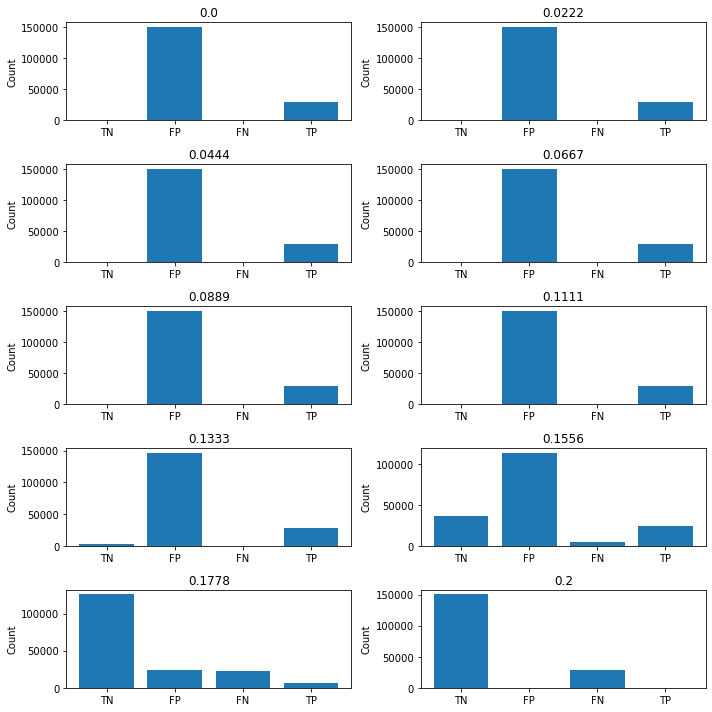

,0.0000,0.0222,0.0444,0.0667,0.0889,0.1111,0.1333,0.1556,0.1778,0.2000
1_real,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000
1_pred,179377.0000,179377.0000,179377.0000,179377.0000,179377.0000,179339.0000,175628.0000,137863.0000,31164.0000,68.0000
0_real,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000
0_pred,0.0000,0.0000,0.0000,0.0000,0.0000,38.0000,3749.0000,41514.0000,148213.0000,179309.0000
tn,0.0000,0.0000,0.0000,0.0000,0.0000,36.0000,3444.0000,36770.0000,125768.0000,150246.0000
fp,150302.0000,150302.0000,150302.0000,150302.0000,150302.0000,150266.0000,146858.0000,113532.0000,24534.0000,56.0000
fn,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,305.0000,4744.0000,22445.0000,29063.0000
tp,29075.0000,29075.0000,29075.0000,29075.0000,29075.0000,29073.0000,28770.0000,24331.0000,6630.0000,12.0000
tn_%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9000,20.5000,70.1000,83.8000
fp_%,83.8000,83.8000,83.8000,83.8000,83.8000,83.8000,81.9000,63.3000,13.7000,0.0000


In [ ]:
threshold_func(y_val, y_val_pred_proba, threshold_list)

Threshold에 따른 목적함수 값 비교

In [ ]:
OPT_threshold = None
OPT_expected_loss = None

def objective_func(y_pred_proba, threshold_list):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
        
        expected_loss_list = []
        
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
            
            # make Binarizer(y hat)
            binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
            custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

            tn, fp, fn, tp = confusion_matrix(y_val, custom_predict).ravel()
            count = [tn, fp, fn, tp]
            
            tpr_1 = fn / (fn + tp)
            fpr = fp / (fp + tn)
            w1 = 0.55
            w2 = 0.45
            
            expected_loss = w1 * tpr_1 + w2 * fpr
            
            expected_loss_list.append(expected_loss)
            
            threshold_tag = round(threshold_list[i], 4)
        
            result_df[threshold_tag] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]
            
            if i == 0:
                opt_threshold = threshold
                opt_expected_loss = expected_loss
            else:
                if opt_expected_loss > expected_loss:
                    opt_threshold = threshold
                    opt_expected_loss = expected_loss
                    
#         expected_loss_list = [round(x, 1) for x in expected_loss_list]

        print(opt_threshold)
        print(opt_expected_loss)
        
        plt.plot(threshold_list, expected_loss_list)
        plt.scatter(threshold_list, expected_loss_list)
        
        plt.xlabel('Threshold')
        plt.ylabel('Expected_Loss')
        plt.title('Expected Loss of Thresholds of %s'%(model_name))

        plt.savefig("%s_expected_loss_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
        
        plt.show()
        
        global OPT_threshold
        OPT_threshold = opt_threshold
        global OPT_expected_loss
        OPT_expected_loss = opt_expected_loss
        
        result_df.to_csv('%s_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.3f', index=True)
        
        return result_df

0.15555555555555556
0.4296519712968146


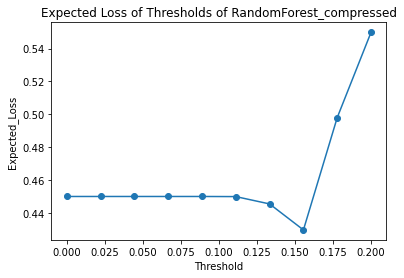

,0.0000,0.0222,0.0444,0.0667,0.0889,0.1111,0.1333,0.1556,0.1778,0.2000
1-TPR,0.00,0.00,0.00,0.00,0.00,0.000069,0.010490,0.163164,0.771969,0.999587
FPR,1.00,1.00,1.00,1.00,1.00,0.999760,0.977086,0.755359,0.163231,0.000373
w1_1-TPR,0.00,0.00,0.00,0.00,0.00,0.000038,0.005770,0.089740,0.424583,0.549773
w2_FPR,0.45,0.45,0.45,0.45,0.45,0.449892,0.439689,0.339912,0.073454,0.000168
Expected_loss,0.45,0.45,0.45,0.45,0.45,0.449930,0.445458,0.429652,0.498037,0.549941


In [ ]:
objective_func(y_val_pred_proba, threshold_list)

# 더 세밀한 범위에서 optimal threshold를 잡고싶으면 한 번 더 다시 실행

In [ ]:
OPT_threshold

0.15555555555555556

histogram에 optimal threshold 표시

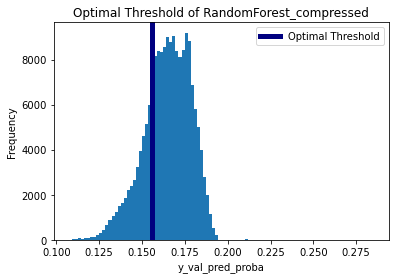

In [ ]:
plt.hist(y_val_pred_proba[:,1], bins=100)

plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('y_val_pred_proba')
plt.ylabel('Frequency')
plt.title('Optimal Threshold of %s'%(model_name))
plt.legend()

plt.savefig("%s_opt_threshold_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

# Test 

### X_test fitting

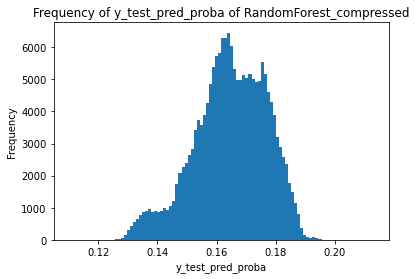

In [ ]:
# Predict probabilities for new data
y_test_pred_proba = best_estimator.predict_proba(X_test) # 확률로 추정된 X_test의 y_pred

plt.hist(y_test_pred_proba[:,1], bins=100)

plt.xlabel('y_test_pred_proba')
plt.ylabel('Frequency')
plt.title('Frequency of y_test_pred_proba of %s'%(model_name))

plt.savefig("%s_test_pre_proba_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')

plt.show() # y_test_pred_proba의 분포 확인

### 0, 1 count / confusion_matrix / accuracy, precision, recall, f1 score 

In [ ]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

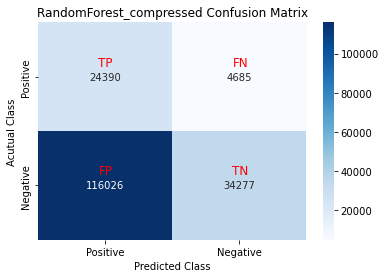

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,38962.0,29075.0,140416.0,34277.0,116026.0,4685.0,24390.0,19.1,64.7,2.6,13.6,0.3271,0.1737,0.8389,0.2878


In [ ]:
test_func(y_test, y_test_pred_proba, OPT_threshold)

### Objective Function

In [ ]:
def test_objective_func(y_test, y_pred_proba, threshold):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
            
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba[:,1].reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba[:,1].reshape(-1,1))

        tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
        count = [tn, fp, fn, tp]

        tpr_1 = fn / (fn + tp)
        fpr = fp / (fp + tn)
        w1 = 0.55
        w2 = 0.45

        expected_loss = w1 * tpr_1 + w2 * fpr

        result_df[threshold] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]

        print(expected_loss)
        
        result_df.T.to_csv('%s_test_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.6f', index=True)
        
        return result_df

In [ ]:
test_objective_func(y_test, y_test_pred_proba, OPT_threshold)

0.4360005475096797


,0.155556
1-TPR,0.161135
FPR,0.771947
w1_1-TPR,0.088624
w2_FPR,0.347376
Expected_loss,0.436001


### ROC curve

거짓 양성 비율(FPR, 1-TNR:1-특이도)에 대한 진짜 양성 비율(TPR, 재현율)의 곡선

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

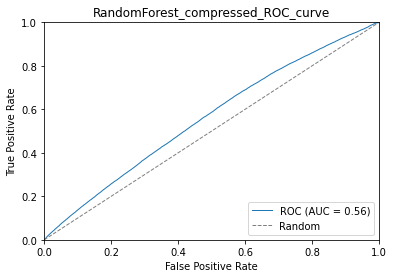

In [ ]:
# Generate ROC curve and AUC score for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()